Helper Method to calculate product of likelihoods over a range of animals

In [ ]:
def product(animals, probability, hypothesis, hs):
  if probability == 0:
    prob = 1/(np.count_nonzero(hs[:,hypothesis] == 1))
  else:
    prob = probability
  count = 1
  for i in range(len(animals)):
    vector = hs[:,hypothesis]
    if vector[animals[i]] == 1:
      count = count*prob
    else:
      return 0
  return count

Posterior (Change range of loop and normalizing denominator when changing hypotheses space, remove normalization before checking predictive)

In [497]:
#animals = set of animals that have given property (animal ids in set)
#cow = 0; dolphin = 1; chicken = 2; seal = 3; penguin = 4; bat = 5
#hypothesis = hypothesis number being observed (property of interest)
#sampling = 0 (weak), 1 (strong)

def posterior(animals, hypothesis, sampling, hs, prior_hypotheses):
  if sampling == 0:
    p = 1
  else:
    p = 0
  product_likelihood = product(animals, p, hypothesis, hs)
  normalize_denominator = 0 
  posterior_hypotheses = 0
  for j in range(0,63):
    normalize_denominator = normalize_denominator + (prior_hypotheses[j]*product(animals, p, j, hs))

  ph = (prior_hypotheses[hypothesis]*product_likelihood)/(normalize_denominator)
  pr_hypotheses = prior_hypotheses
  #setting new posterior value without normalization
  pr_hypotheses[hypothesis] = ph
  normalize_sum = (62/63) +pr_hypotheses[hypothesis]
  #normalizing
  '''   for a in range(0,63):
    posterior_hypotheses[a] = prior_hypotheses[a]/normalize_sum '''
  return ph


  



Predictive (update range for looping when changing hypotheses space)

In [498]:
#predictive
def predictive(animal_to_predict, animals_observed, h_space, sampling, prior):
  predictive = 0
  iterative_hypotheses = []
  for m in range(0,63):
    hyp = h_space[:,m]
    if hyp[animal_to_predict] == 1:
      iterative_hypotheses.append(m)
  predictive = 0
  print(iterative_hypotheses)
  for h in iterative_hypotheses:
    predictive = predictive + posterior(animals_observed, h, sampling, h_space, prior)
  return predictive

Graphs (Ignore for other questions)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
  1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
  0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
  0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]]
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 

Text(0.5, 1.0, 'Predictive Distribution after observing Chicken, Penguin & Seal using Strong Sampling (All hypotheses possible)')

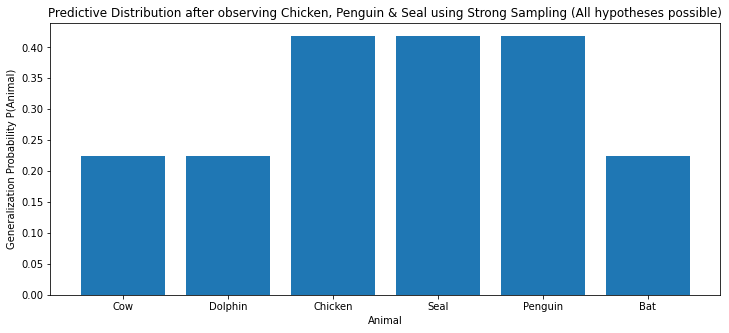

In [505]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import itertools
''' #generating hypotheses space
lst = list(itertools.product([0, 1], repeat=6))
lst = np.array(lst).T
print(lst)
#removing all 0 hypothesis
lst = np.delete(lst, 0, 1)
hypotheses_space = lst
#uniform distribution
prior_hypotheses = np.array([1/63]*63)

h = 0
#pick a hypothesis to calculate posterior
hypo = np.array([1,0,1,1,1,1])

#find hypothesis number in hypotheses space
for i in range(0,63):
  if np.array_equal(hypotheses_space[:,i], hypo):
    h = i
 '''
#defining hypotheses

''' h0 = np.array([0,0,1,0,0,1])
h1 = np.array([1,0,1,0,0,0])
h2 = np.array([0,1,0,0,0,1])
h3 = np.array([1,0,1,1,1,1])
h4 = np.array([0,1,0,1,1,0])
h5 = np.array([1,1,1,1,1,1])
h6 = np.array([0,1,1,0,1,0])
h7 = np.array([0,1,1,1,1,1])
hypotheses = np.array([h0,h1,h2,h3,h4,h5,h6,h7]).T
prior_hypotheses = np.array([0.125]*8) '''

predictive_dist_weak_single = [0]*6
for b in range(0,6):
  lst = list(itertools.product([0, 1], repeat=6))
  lst = np.array(lst).T
  print(lst)
  #removing all 0 hypothesis
  lst = np.delete(lst, 0, 1)
  hypotheses_space = lst
  #uniform distribution
  prior_hypotheses = np.array([1/63]*63)
  predictive_dist_weak_single[b] = predictive(b, [2,3,4], hypotheses_space, 1, prior_hypotheses)
print(predictive_dist_weak_single)
plt.figure(figsize= (12,5))
plt.bar(["Cow", "Dolphin", "Chicken", "Seal", "Penguin", "Bat"],predictive_dist_weak_single)
plt.xlabel("Animal")
plt.ylabel("Generalization Probability P(Animal)")
plt.title("Predictive Distribution after observing Chicken, Penguin & Seal using Strong Sampling (All hypotheses possible)")

Call Methods

In [461]:
import itertools
#generating hypotheses space for all possible hypotheses
lst = list(itertools.product([0, 1], repeat=6))
lst = np.array(lst).T
print(lst)
#removing all 0 hypothesis
lst = np.delete(lst, 0, 1)
hypotheses_space = lst
#uniform distribution
prior_hypotheses = np.array([1/63]*63)

h = 0
#pick a hypothesis to calculate posterior
hypo = np.array([1,0,1,1,1,1])

#find hypothesis number in hypotheses space
for i in range(0,63):
  if np.array_equal(hypotheses_space[:,i], hypo):
    h = i

#make predictive and psoterior calls below as required
print(predictive(2, [2], hypotheses_space, 0, prior_hypotheses))



[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
  1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
  0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
  0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]]
[7]
1.0
